In [ ]:
import pandas as pd
from datetime import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns

### Data Preprocessing

In [10]:
# 1. The data types of data in few columns are not correct to do statistical analysis, hence it needs to be fixed using dtype, astype()
data = pd.read_csv('startup_funding.csv')
data.rename(columns={"Date (dd/mm/yyyy)": "Date", 'Startup Name': 'StartupName', "Industry/ Vertical":'IndustryVertical', "Sub-Vertical": 'SubVertical', "City / Location": 'CityLocation', "Investors’ Name": 'InvestorsName','Investment Type':'InvestmentType', 'Amount (in USD)':'AmountUSD'}, inplace=True)
data.head()

,Sr. No.,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountUSD
0,1,02/02/2017,Clodura,Technology,Intelligent Sales Assistant,Pune,Undisclosed Investors,Seed Funding,N/A
1,2,03/02/2017,Stockroom.io,Consumer Internet,Curated Platform for Developers,Hyderabad,"Satya D Sinha, Gyanendra Singh",Seed Funding,N/A
2,3,06/02/2017,Capital Float,Consumer Internet,Online lending platform,Bangalore,IFMR Capital Finance,Private Equity,"2,500,000"
3,4,06/02/2017,iManageMyHotel,Technology,Hotel Management Solution,Kolkata,Jaarvis Accelerator,Seed Funding,N/A
4,5,07/02/2017,Inner Hour,Consumer Internet,Online Counselling Platform,Mumbai,"Batlivala & Karani Securities, Venture Works",Seed Funding,"450,000"


In [11]:
# 2. Few values 'Date' column are not in correcdt date format checking those rows

del_index=data[~data.Date.str.contains('.')].index
data.drop(inplace=True, index=del_index)
data = data.reindex()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3471 entries, 0 to 3509
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sr. No.           3471 non-null   object
 1   Date              3471 non-null   object
 2   StartupName       3471 non-null   object
 3   IndustryVertical  3471 non-null   object
 4   SubVertical       3471 non-null   object
 5   CityLocation      3471 non-null   object
 6   InvestorsName     3471 non-null   object
 7   InvestmentType    3300 non-null   object
 8   AmountUSD         3300 non-null   object
dtypes: object(9)
memory usage: 271.2+ KB


In [12]:
# 3. Correcting values Date column

data.loc[data['Date']=="01/07/015", 'Date'] = "01/07/2015"
data.loc[data['Date']=="Â 10/7/2015", 'Date'] = "10/07/2015"
data.loc[data['Date']=="05/072018", 'Date'] = "05/07/2018"
data.loc[data['Date']=="12/05.2015", 'Date'] = "12/05/2015"
data.loc[data['Date']=="15/01.2015", 'Date'] = "15/01/2015"
data.loc[data['Date']=="22/01//2015", 'Date'] = "22/01/2015"
data.loc[data['Date']=="13/04.2015", 'Date'] = "13/04/2015"

In [13]:
# 4. Converting 'Date' column from string to Date format to separate Year, month, also to display charts. 

data['Date']= pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3471 entries, 0 to 3509
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Sr. No.           3471 non-null   object        
 1   Date              3471 non-null   datetime64[ns]
 2   StartupName       3471 non-null   object        
 3   IndustryVertical  3471 non-null   object        
 4   SubVertical       3471 non-null   object        
 5   CityLocation      3471 non-null   object        
 6   InvestorsName     3471 non-null   object        
 7   InvestmentType    3300 non-null   object        
 8   AmountUSD         3300 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 271.2+ KB


In [14]:
# 5. Some values for 'AmountUSD' are present in 'InvestmentType' column

data['NewAmountUSD'] = data['AmountUSD']
data.loc[((data['AmountUSD'].str.contains('[a-zA-Z]')) | (data['AmountUSD'].isin(['nan','']))) & (data['InvestmentType'].str.contains('[0-9]')), 'NewAmountUSD'] = data['InvestmentType']
data.iloc[347:355, :]

#data.loc[(~ data['InvestmentType'].isin(['N/A', 'NaN'])) & (data['InvestmentType'].str.contains(','))]

,Sr. No.,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountUSD,NewAmountUSD
350,41,2017-11-24,IDG Ventures,Finance,Venture Capitalist,Bangalore,Uniliver Ventures,Private Equity,"10,000,000","10,000,000"
351,42,2017-11-24,TempGo,Technology,IoT and SaaS based transportation platform,Goa,Javelin StartupO Victory Fund,Seed/Angel Funding,"250,000","250,000"
352,43,2017-11-27,Edelweiss,Finance,Diversified Financial,Mumbai,Undisclosed investors,Private Equity,"270,000,000","270,000,000"
353,44,2017-11-27,ERA,Technology,Identity management platform,Mumbai,Amit Patni,Seed/Angel Funding,"39,000","39,000"
354,44,2017-11-27,Smaaash,Technology,Virtual Reality based gaming platform,Mumbai,Sixth Sense Ventures,Private Equity,"3,800,000","3,800,000"
355,45,2017-11-28,Chumbak,Lifestyle,Designer-led consumer products,Bangalore,Gaja Capital,Private Equity,"13,000,000","13,000,000"
356,46,2017-11-28,FR8,Technology,Online Truck aggregator platform,Chennai,IFMR Capital,Debt Funding,"1,500,000","1,500,000"
357,47,2017-11-28,MobieFit,Healthcare,Health and fitness based mobile App,Goa,"NB Ventures, MediAssist",Seed/Angel Funding,"1,350,000","1,350,000"


In [15]:
# 6. Converting datatype of values in 'AmountUSD' column from string to float. Marking Undisclosed values to 'nan' and then converting into float type
# Also imputing blank values in 'Amount' column by minimum funding amount

data.loc[data['NewAmountUSD'].isin(['undisclosed', 'unknown', 'Undisclosed', 'N/A']), 'NewAmountUSD'] = 'nan'
data['NewAmountUSD'] = data['NewAmountUSD'].astype(str)
data['NewAmountUSD'] = data['NewAmountUSD'].apply(lambda x : re.sub("[^0-9]", "", x))
data.loc[data['NewAmountUSD']=='', 'NewAmountUSD'] = 0 #'nan' # replace with average of funding provided that months 
data['NewAmountUSD'] = data['NewAmountUSD'].astype(float)
data.loc[data['NewAmountUSD']==0.0, 'NewAmountUSD'] = data['NewAmountUSD'].min()
data.head()

,Sr. No.,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountUSD,NewAmountUSD
0,1,2017-02-02,Clodura,Technology,Intelligent Sales Assistant,Pune,Undisclosed Investors,Seed Funding,N/A,0.0
1,2,2017-03-02,Stockroom.io,Consumer Internet,Curated Platform for Developers,Hyderabad,"Satya D Sinha, Gyanendra Singh",Seed Funding,N/A,0.0
2,3,2017-06-02,Capital Float,Consumer Internet,Online lending platform,Bangalore,IFMR Capital Finance,Private Equity,"2,500,000",2500000.0
3,4,2017-06-02,iManageMyHotel,Technology,Hotel Management Solution,Kolkata,Jaarvis Accelerator,Seed Funding,N/A,0.0
4,5,2017-07-02,Inner Hour,Consumer Internet,Online Counselling Platform,Mumbai,"Batlivala & Karani Securities, Venture Works",Seed Funding,"450,000",450000.0


In [16]:
# 7. Correcting values in 'CityLocation' column

data.loc[data['CityLocation'] == 'Bangalore', 'CityLocation'] = 'Bengaluru'
data.loc[data['CityLocation'] == 'Gurgaon', 'CityLocation'] = 'Gurugram'
data.loc[data['CityLocation'] == 'New Delhi', 'CityLocation'] = 'Delhi'

In [17]:
# 8. Decomposing Date into Year, month, YearMonth to do analysis by quarter

data['YearMonth'] = data['Date'].map(lambda x: 100*x.year + x.month)
data['Year'] = data['Date'].map(lambda x: x.year)
data['Month'] = data['Date'].map(lambda x: x.month)

In [18]:
# 9. Correcting values in 'InvestmentType' column

data.loc[(data['InvestmentType'].isin(['', 'N/A', 'Undisclosed investors', 'Undisclosed Investor', 'Undisclosed Investors', \
                                     'Undisclosed', 'undisclosed investors', 'Undisclosed investor', \
                                     'Undisclosed multiple investors', 'Undisclosed angel investors', \
                                     '3 undisclosed investors'])) | (data['InvestmentType'].str.contains('[0-9]')), 'InvestmentType'] = 'Undisclosed Investors'

In [19]:
# 10. Correcting values in 'InvestorsName' column

data.loc[data['InvestorsName'].isin(['',' ', "N/A"]), 'InvestorsName'] = "Undisclosed Investors"

In [20]:
# 11. removing rows not having startup name

data.drop(index=data[data['StartupName']==''].index, inplace=True)
data.shape

(3455, 13)

# EDA

In [21]:
startup_data = data[['Date', 'Year', 'Month', 'StartupName', 'IndustryVertical', 'SubVertical', 'CityLocation', 'InvestorsName', 'InvestmentType', 'NewAmountUSD']]
startup_data['Date'] = pd.to_datetime(startup_data.Date)
startup_data.set_index('Date', inplace=True)
startup_data.head()

,Year,Month,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,NewAmountUSD
Date,,,,,,,,,
2017-02-02,2017,2,Clodura,Technology,Intelligent Sales Assistant,Pune,Undisclosed Investors,Seed Funding,0.0
2017-03-02,2017,3,Stockroom.io,Consumer Internet,Curated Platform for Developers,Hyderabad,"Satya D Sinha, Gyanendra Singh",Seed Funding,0.0
2017-06-02,2017,6,Capital Float,Consumer Internet,Online lending platform,Bengaluru,IFMR Capital Finance,Private Equity,2500000.0
2017-06-02,2017,6,iManageMyHotel,Technology,Hotel Management Solution,Kolkata,Jaarvis Accelerator,Seed Funding,0.0
2017-07-02,2017,7,Inner Hour,Consumer Internet,Online Counselling Platform,Mumbai,"Batlivala & Karani Securities, Venture Works",Seed Funding,450000.0


In [22]:
startup_data.to_csv("startup_funding_data.csv")

In [23]:
funding_count_yr = pd.DataFrame(startup_data['Year'].value_counts())
funding_count_yr.rename(columns={"Year":"Number of Fundings"}, inplace=True)
funding_count_yr

,Number of Fundings
2016,1018
2015,936
2017,687
2018,553
2020,121
2019,111
2021,29


In [24]:
funding_count_qtr = pd.DataFrame(data=startup_data['Year'].resample('QS').count())
funding_count_qtr.rename(columns={'Year':'Number of Fundings(Qtr)'}, inplace=True)
funding_count_qtr['QtrMonth'] = ['2015-1', '2015-4', '2015-7', '2015-10', '2016-1', '2016-4', '2016-7', '2016-10', '2017-1', '2017-4', '2017-7', '2017-10', '2018-1', '2018-4', '2018-7', '2018-10', '2019-1', '2019-4', '2019-7', '2019-10', '2020-1', '2020-4', '2020-7', '2020-10','2021-1', '2021-4', '2021-7', '2021-10']
funding_count_qtr

,Number of Fundings(Qtr),QtrMonth
Date,,
2015-01-01,209,2015-1
2015-04-01,215,2015-4
2015-07-01,275,2015-7
2015-10-01,237,2015-10
2016-01-01,251,2016-1
2016-04-01,265,2016-4
2016-07-01,264,2016-7
2016-10-01,238,2016-10
2017-01-01,183,2017-1


In [25]:
funding_total_yr = pd.DataFrame(startup_data.groupby(by=['Year'])['NewAmountUSD'].sum())
funding_total_yr.rename(columns={"NewAmountUSD":"Total Funding(USD-Bn)"}, inplace=True)
funding_total_yr = funding_total_yr.sort_values(by='Total Funding(USD-Bn)', ascending=False)           # the total funding amount is in USD
funding_total_yr

,Total Funding(USD-Bn)
Year,
2020,7.500000e+16
2019,1.195203e+10
2018,1.118703e+10
2017,1.042931e+10
2015,7.441213e+09
2021,3.915104e+09
2016,3.905859e+09


In [26]:
funding_total_qtr = pd.DataFrame(data=startup_data['NewAmountUSD'].resample('QS').sum())
funding_total_qtr.rename(columns={'NewAmountUSD':'Total Fundings(Qtr USD-Bn)'}, inplace=True)
funding_total_qtr['QtrMonth'] = ['2015-1', '2015-4', '2015-7', '2015-10', '2016-1', '2016-4', '2016-7', '2016-10', '2017-1', '2017-4', '2017-7', '2017-10', '2018-1', '2018-4', '2018-7', '2018-10', '2019-1', '2019-4', '2019-7', '2019-10', '2020-1', '2020-4', '2020-7', '2020-10','2021-1', '2021-4', '2021-7', '2021-10']
funding_total_qtr

,Total Fundings(Qtr USD-Bn),QtrMonth
Date,,
2015-01-01,1.061858e+09,2015-1
2015-04-01,1.165205e+09,2015-4
2015-07-01,3.700103e+09,2015-7
2015-10-01,1.514047e+09,2015-10
2016-01-01,1.104478e+09,2016-1
2016-04-01,6.050770e+08,2016-4
2016-07-01,1.252866e+09,2016-7
2016-10-01,9.434380e+08,2016-10
2017-01-01,2.905944e+09,2017-1


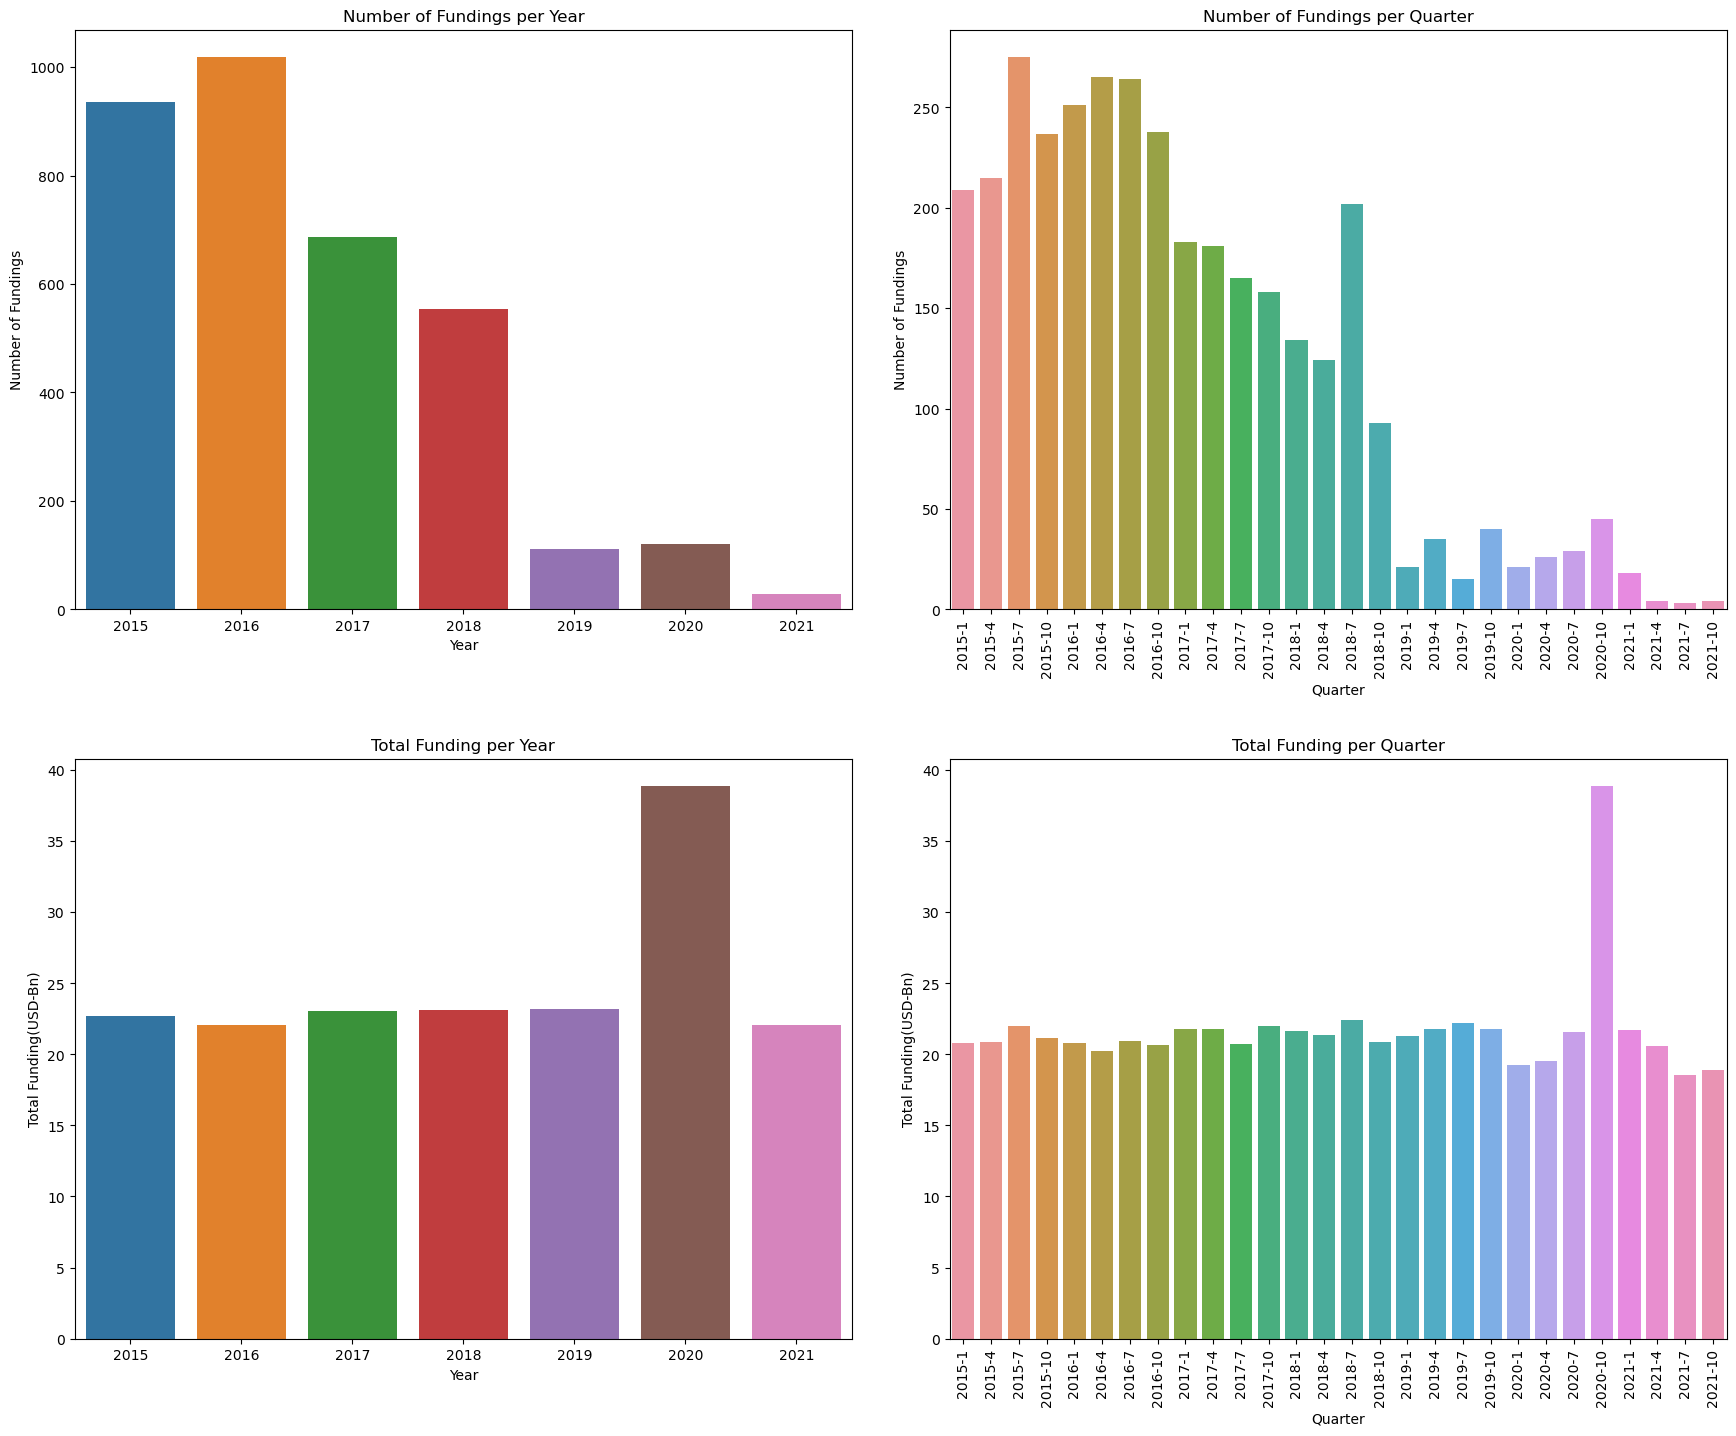

In [104]:
import numpy as np

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,15))

sns.barplot(x=funding_count_yr.index, y=funding_count_yr['Number of Fundings'], data=funding_count_yr, ax=axes[0,0], orient='v')
axes[0,0].set_title("Number of Fundings per Year")
axes[0,0].set_xlabel("Year")
axes[0,0].set_ylabel("Number of Fundings")

sns.barplot(x=funding_count_qtr.index, y=funding_count_qtr['Number of Fundings(Qtr)'], data=funding_count_qtr, ax=axes[0,1], orient='v')
axes[0,1].set_title("Number of Fundings per Quarter")
axes[0,1].set_xlabel("Quarter")
axes[0,1].set_ylabel("Number of Fundings")
axes[0,1].set_xticklabels(rotation=90, labels=funding_total_qtr['QtrMonth'])

sns.barplot(x=funding_total_yr.index, y=np.log(funding_total_yr['Total Funding(USD-Bn)']), data=funding_total_yr, ax=axes[1,0], orient='v')
axes[1,0].set_title("Total Funding per Year")
axes[1,0].set_xlabel("Year")
axes[1,0].set_ylabel("Total Funding(USD-Bn)")

sns.barplot(x=funding_total_qtr.index, y=np.log(funding_total_qtr['Total Fundings(Qtr USD-Bn)']), data=funding_total_qtr, ax=axes[1,1], orient='v')
axes[1,1].set_title("Total Funding per Quarter")
axes[1,1].set_xlabel("Quarter")
axes[1,1].set_ylabel("Total Funding(USD-Bn)")
axes[1,1].set_xticklabels(rotation=90, labels=funding_total_qtr['QtrMonth'])

fig.tight_layout(pad=3)
plt.show()


In [28]:
# Fundings by cities

fundings_count_city = pd.DataFrame(startup_data['CityLocation'].value_counts().sort_values(ascending=False)[:10])
fundings_count_city.rename(columns={'CityLocation':'Number of Fundings by City'}, inplace=True)
fundings_count_city.head()

,Number of Fundings by City
Bengaluru,802
Mumbai,472
Delhi,349
Gurugram,321
Pune,100


In [67]:
funding_total_city = pd.DataFrame(startup_data.groupby('CityLocation')['NewAmountUSD'].sum()).sort_values(by="NewAmountUSD", ascending=False)[:10]
funding_total_city.rename(columns={'NewAmountUSD':'Total Funding by City(USD-Bn)'}, inplace=True)
funding_total_city.head()


,Total Funding by City(USD-Bn)
CityLocation,
Bengaluru,7.500002e+16
Mumbai,7.605875e+09
Gurugram,4.440912e+09
Delhi,2.370362e+09
Noida,1.272344e+09


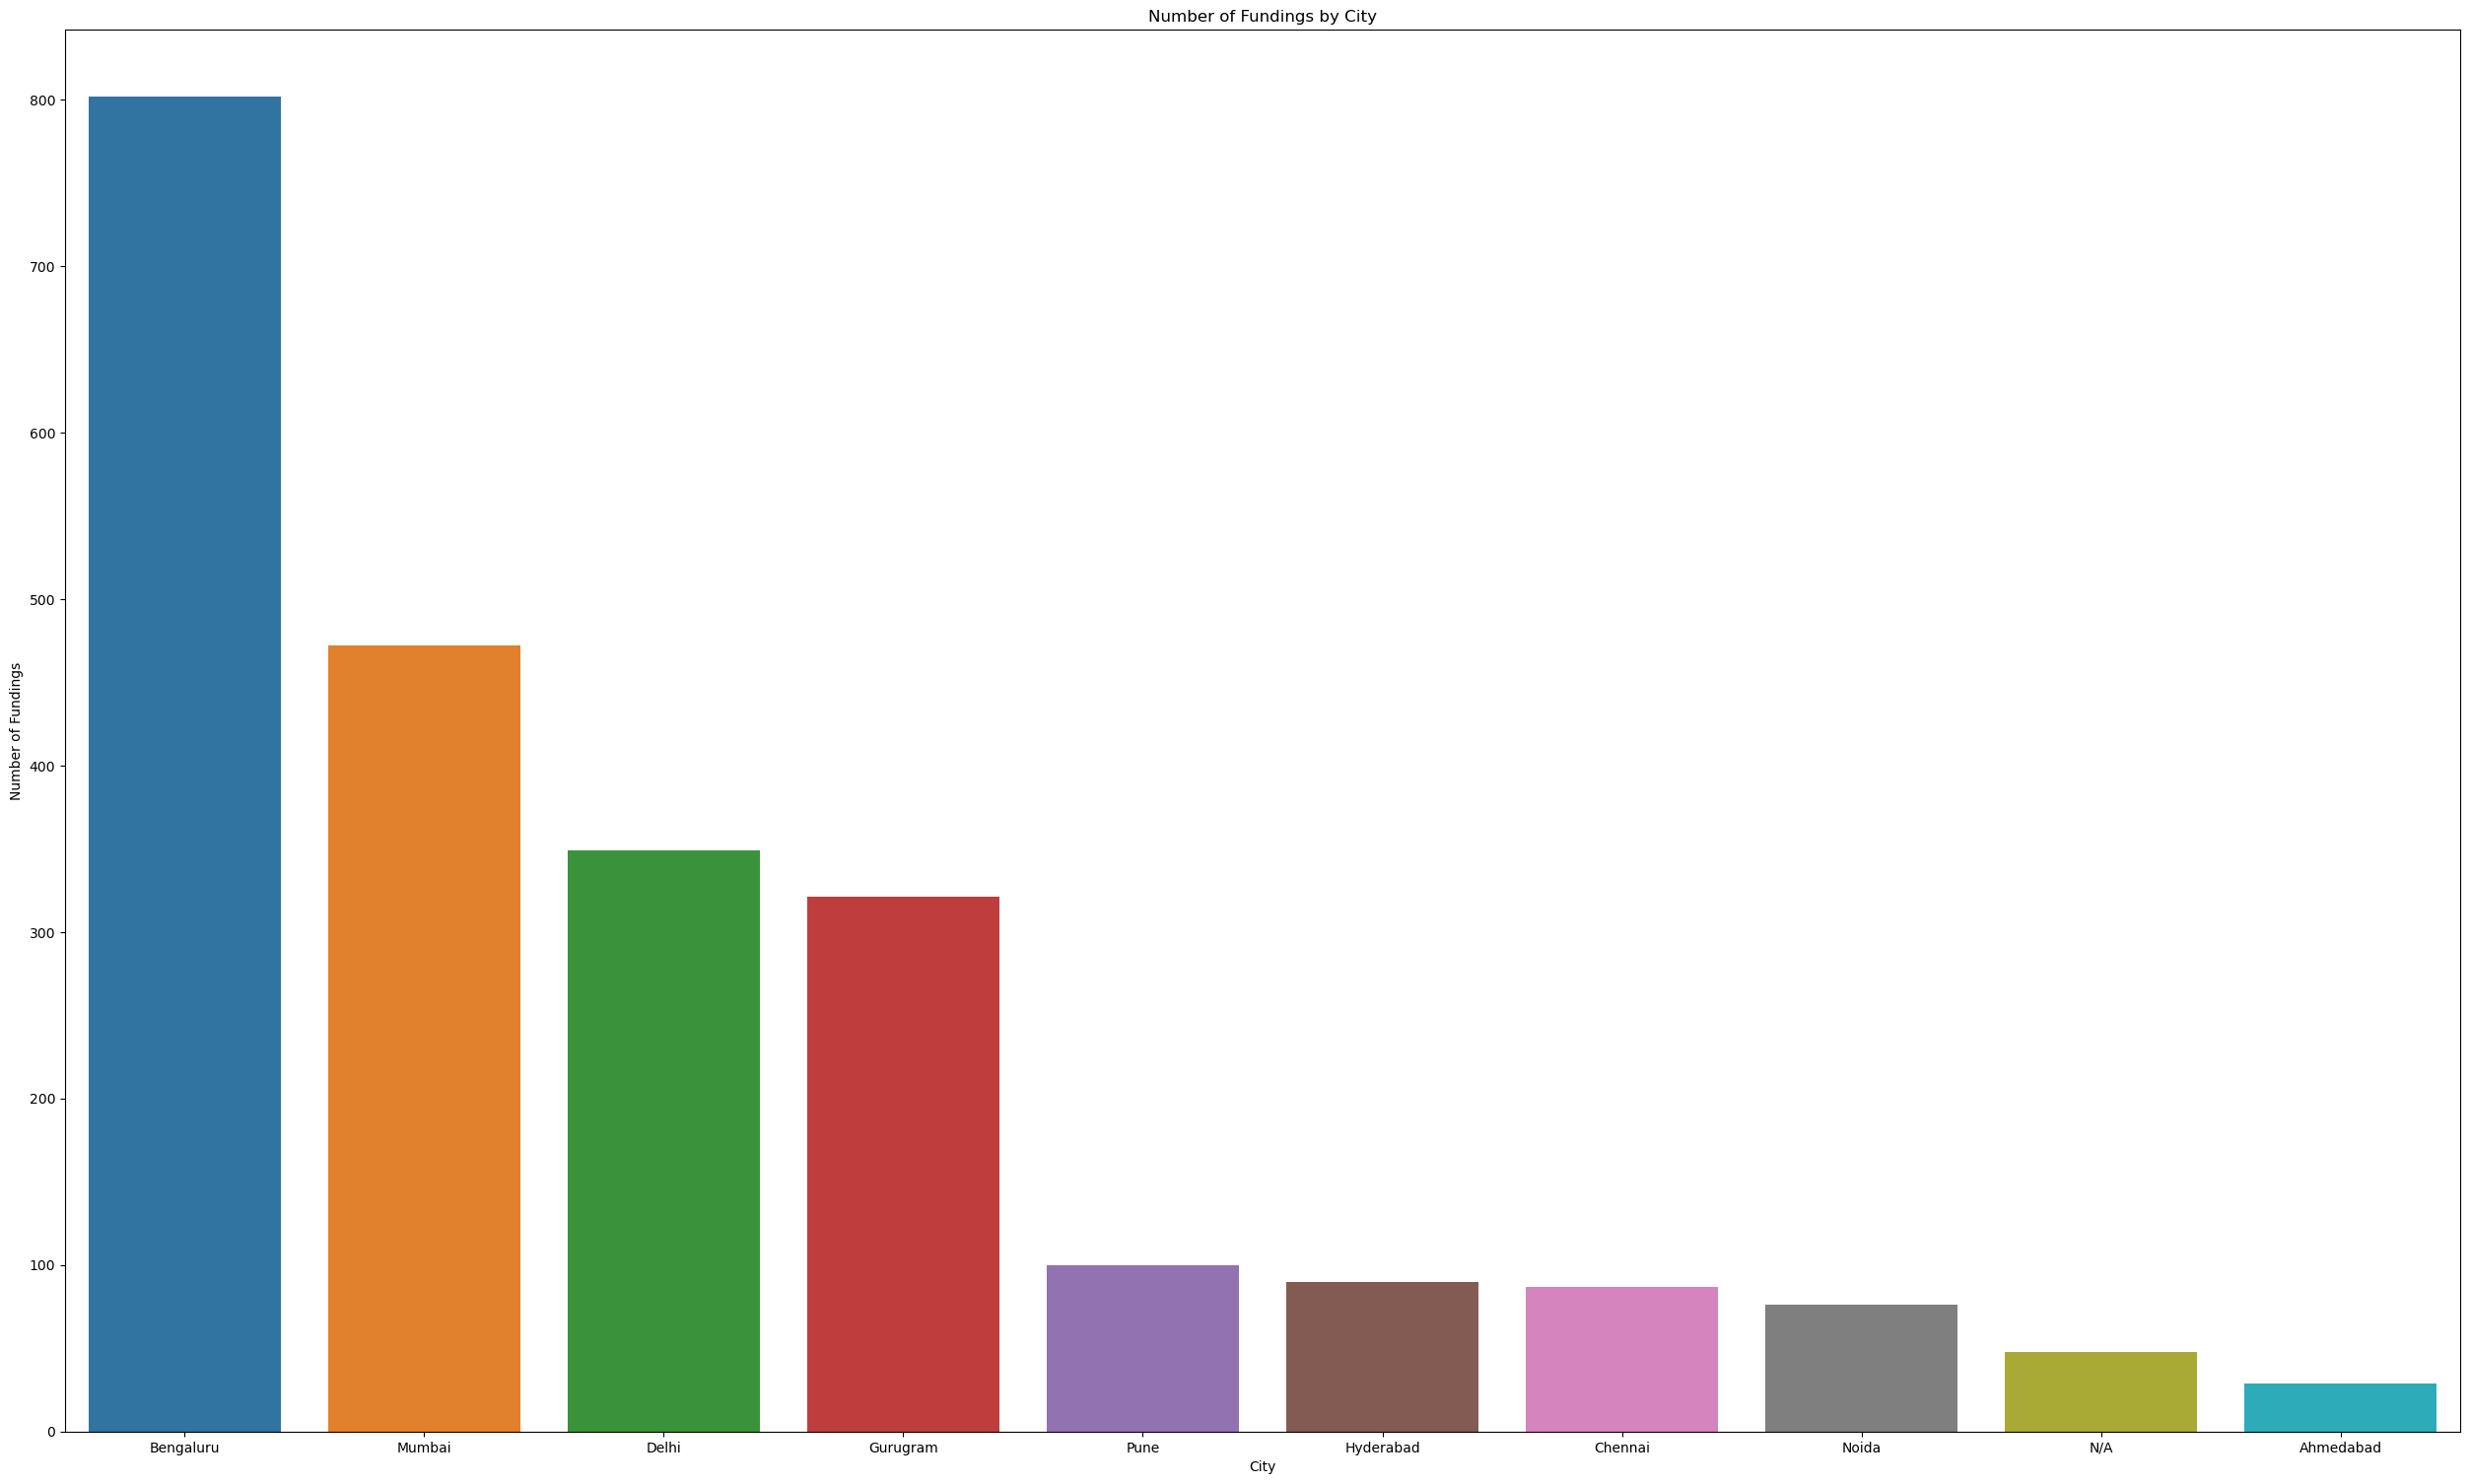

In [106]:
# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 15))

# sns.barplot(x=fundings_count_city.index, y=fundings_count_city['Number of Fundings by City'], data=fundings_count_city, ax=axes[0])
# sns.barplot(x=funding_total_city.index, y=np.log(funding_total_city['Total Funding by City(USD-Bn)']), data=funding_total_city, ax=axes[1]).set_xticklabels(rotation=90, labels=funding_total_city.index)

# fig.tight_layout(pad=0.5)
# plt.show()

# Just plot the numer of fundings by city

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25, 15))

sns.barplot(x=fundings_count_city.index, y=fundings_count_city['Number of Fundings by City'], data=fundings_count_city, ax=axes)
axes.set_title("Number of Fundings by City")
axes.set_xlabel("City")
axes.set_ylabel("Number of Fundings")

fig.tight_layout(pad=0.5)
plt.show()


In [76]:
fundings_count_industry = pd.DataFrame(startup_data['IndustryVertical'].value_counts().sort_values(ascending=False))[:10]
fundings_count_industry.rename(columns={'IndustryVertical':'Number of Fundings by Industry'}, inplace=True)
fundings_count_industry

,Number of Fundings by Industry
Consumer Internet,1069
Technology,516
eCommerce,189
Healthcare,91
Finance,83
ECommerce,61
E-commerce,36
Logistics,35
E-Commerce,29
Education,25


In [138]:
# combine the industies that have have commerce in their name

startup_data['IndustryVertical'] = startup_data['IndustryVertical'].replace(to_replace='ECommerce', value='E-Commerce')
startup_data['IndustryVertical'] = startup_data['IndustryVertical'].replace(to_replace='ecommerce', value='E-Commerce')
startup_data['IndustryVertical'] = startup_data['IndustryVertical'].replace(to_replace='Ecommerce', value='E-Commerce')
startup_data['IndustryVertical'] = startup_data['IndustryVertical'].replace(to_replace='E-commerce', value='E-Commerce')
startup_data['IndustryVertical'] = startup_data['IndustryVertical'].replace(to_replace='E-Commerce', value='E-Commerce')
startup_data['IndustryVertical'] = startup_data['IndustryVertical'].replace(to_replace='eCommerce', value='E-Commerce')

# combine the industies that have have fintech in their name

startup_data['IndustryVertical'] = startup_data['IndustryVertical'].replace(to_replace='FinTech', value='Fintech')
startup_data['IndustryVertical'] = startup_data['IndustryVertical'].replace(to_replace='Fin-Tech', value='Fintech')
startup_data['IndustryVertical'] = startup_data['IndustryVertical'].replace(to_replace='Finance', value='Fintech')





In [139]:
fundings_count_industry = pd.DataFrame(startup_data['IndustryVertical'].value_counts().sort_values(ascending=False))[:10]
fundings_count_industry.rename(columns={'IndustryVertical':'Number of Fundings by Industry'}, inplace=True)
fundings_count_industry

,Number of Fundings by Industry
Consumer Internet,1069
Technology,516
E-Commerce,326
Fintech,132
Healthcare,91
Ed-Tech,64
Logistics,35
Food & Beverage,23
IT,20
Group of Angel Investors,12


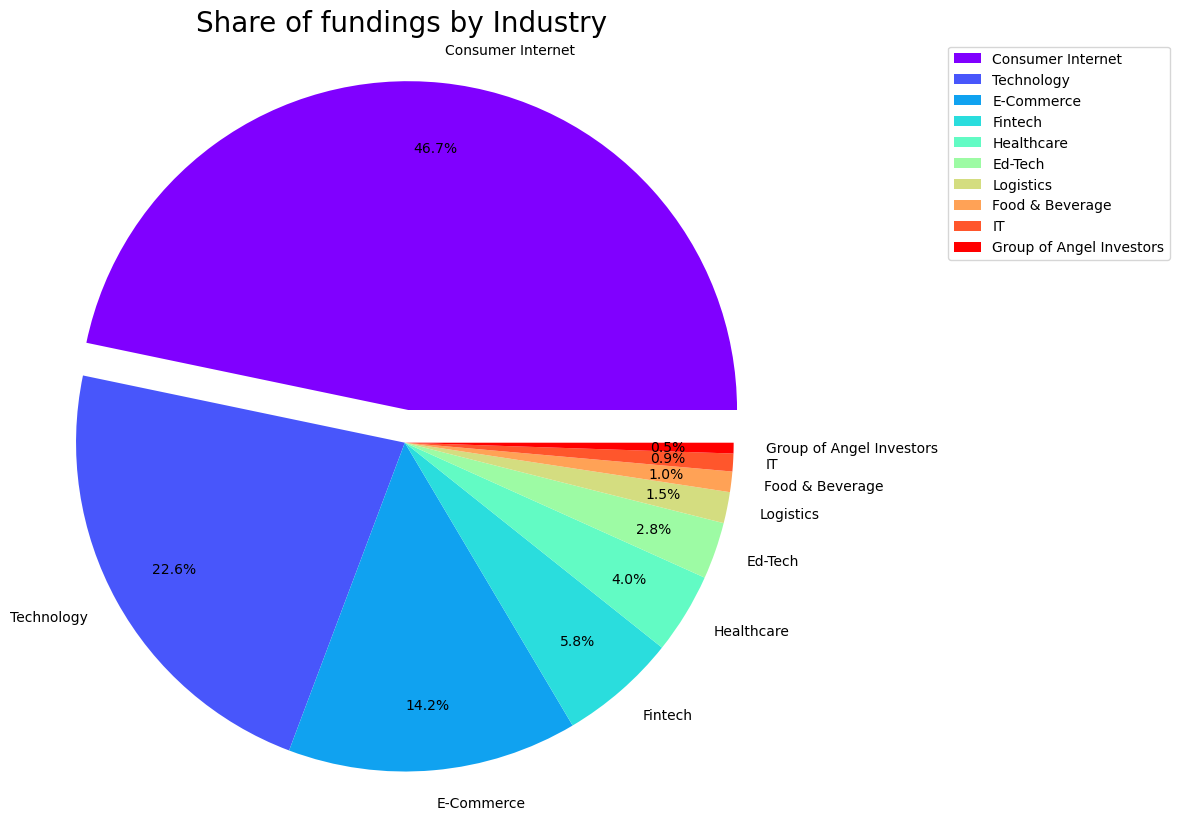

In [137]:
# Plot a 3-d piechart for the share of fundings by industry with percatage labels roated and explode all the slices and use autopct to show the percentage of each slice and show the legend outside the piechart and set the title as "Share of fundings by Industry" and set the figure size as 10,10 and set the background color as black and the piechart color as viridis

fig, axes = plt.subplots(figsize=(10,10))
axes.pie(fundings_count_industry['Number of Fundings by Industry'], labels=fundings_count_industry.index, autopct='%1.1f%%', explode=(0.1,0,0,0,0,0,0,0,0,0), pctdistance=0.8, labeldistance=1.1, colors=plt.cm.rainbow(np.linspace(0, 1, 10)))
axes.set_title('Share of fundings by Industry', fontsize=20)
axes.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
axes.axis('equal')
plt.show()


In [112]:
funding_total_industry = pd.DataFrame(startup_data.groupby('IndustryVertical')['NewAmountUSD'].sum()).sort_values(by="NewAmountUSD", ascending=False)[:10]
funding_total_industry.rename(columns={'NewAmountUSD':'Total Funding by Industry(USD-Bn)'}, inplace=True)
funding_total_industry

,Total Funding by Industry(USD-Bn)
IndustryVertical,
Edutech,7.500000e+16
E-Commerce,1.127290e+10
Consumer Internet,8.945607e+09
Fintech,6.059479e+09
Transportation,3.925282e+09
Technology,2.572689e+09
Digital Media,1.511380e+09
Edu-tech,1.220000e+09
B2B Platform,9.000000e+08


In [113]:
startup_data['InvestorsName']

Date
2017-02-02                                Undisclosed Investors
2017-03-02                       Satya D Sinha, Gyanendra Singh
2017-06-02                                 IFMR Capital Finance
2017-06-02                                  Jaarvis Accelerator
2017-07-02         Batlivala & Karani Securities, Venture Works
                                    ...                        
2016-06-29    Uniqorn Ventures Fund, TV Mohandas Pai, S Soma...
2016-06-30                                        Brand Capital
2016-06-30                                        Aarin Capital
2016-06-30    Omidyar Network, Accel Partners & existing inv...
2016-06-30                           Carpediem Capital & Others
Name: InvestorsName, Length: 3455, dtype: object

In [114]:
funding_count_investor = pd.DataFrame(startup_data['InvestorsName'].value_counts()).sort_values(by='InvestorsName', ascending=False)[:10]
funding_count_investor.rename(columns={'InvestorsName': 'Number of Investments by Investor'}, inplace=True)
funding_count_investor.drop(funding_count_investor[funding_count_investor.index == 'Undisclosed Investors'].index, inplace=True)
funding_count_investor

,Number of Investments by Investor
Seed Funding,414
Private Equity,351
Series A,24
Undisclosed investors,23
Indian Angel Network,17
Ratan Tata,16
Venture Catalysts,14
Series B,11
Brand Capital,11


In [115]:
funding_total_investor = pd.DataFrame(startup_data.groupby(['InvestorsName'])['NewAmountUSD'].sum()).sort_values(by="NewAmountUSD", ascending=False)[:15]
funding_total_investor.rename(columns={'NewAmountUSD':'Total Funding by Investor(USD-Bn)'}, inplace=True)
funding_total_investor

,Total Funding by Investor(USD-Bn)
InvestorsName,
"Tiger Global Management, Dragoneer Investment Group",7.500000e+16
Private Equity,7.308642e+09
Westbridge Capital,3.900000e+09
Softbank,2.500000e+09
Undisclosed Investors,2.457224e+09
Qiming Venture Partners,1.510950e+09
SoftBank Group,1.462000e+09
"Microsoft, eBay, Tencent Holdings",1.400000e+09
Walmart Inc\n,1.200000e+09


In [116]:
startup_data[startup_data['InvestorsName'].isin(['Westbridge Capital', 'Softbank'])]

,Year,Month,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,NewAmountUSD,LogAmount
Date,,,,,,,,,,
2019-08-27,2019,8,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,3.900000e+09,22.084242
2017-11-08,2017,11,Flipkart,E-Commerce,Online Marketplace,Bengaluru,Softbank,Private Equity,2.500000e+09,21.639557


In [117]:
funding_count_company = pd.DataFrame(startup_data['StartupName'].value_counts()).sort_values(by='StartupName', ascending=False)[:15]
funding_count_company.rename(columns={'StartupName': 'Number of Investments by Investor'}, inplace=True)
funding_count_company

,Number of Investments by Investor
Nykaa,11
Swiggy,10
Ola Cabs,8
Meesho,7
Paytm,7
Udaan,7
Shuttl,7
EazyDiner,7
MamaEarth,6
NoBroker,6


In [118]:
funding_total_company = pd.DataFrame(startup_data.groupby('StartupName')['NewAmountUSD'].sum()).sort_values(by='NewAmountUSD', ascending=False)[:15]
funding_total_company.rename(columns={'NewAmountUSD': "Total amount Raised by Startup (USD-Bn)"}, inplace=True)
funding_total_company

,Total amount Raised by Startup (USD-Bn)
StartupName,
Unacademy,7.500000e+16
Flipkart,5.259700e+09
Rapido Bike Taxi,3.900000e+09
Paytm,3.148950e+09
True North,2.400000e+09
Udaan,1.545000e+09
Pratilipi,1.515250e+09
BYJU’S,1.120000e+09
Ola,9.845000e+08


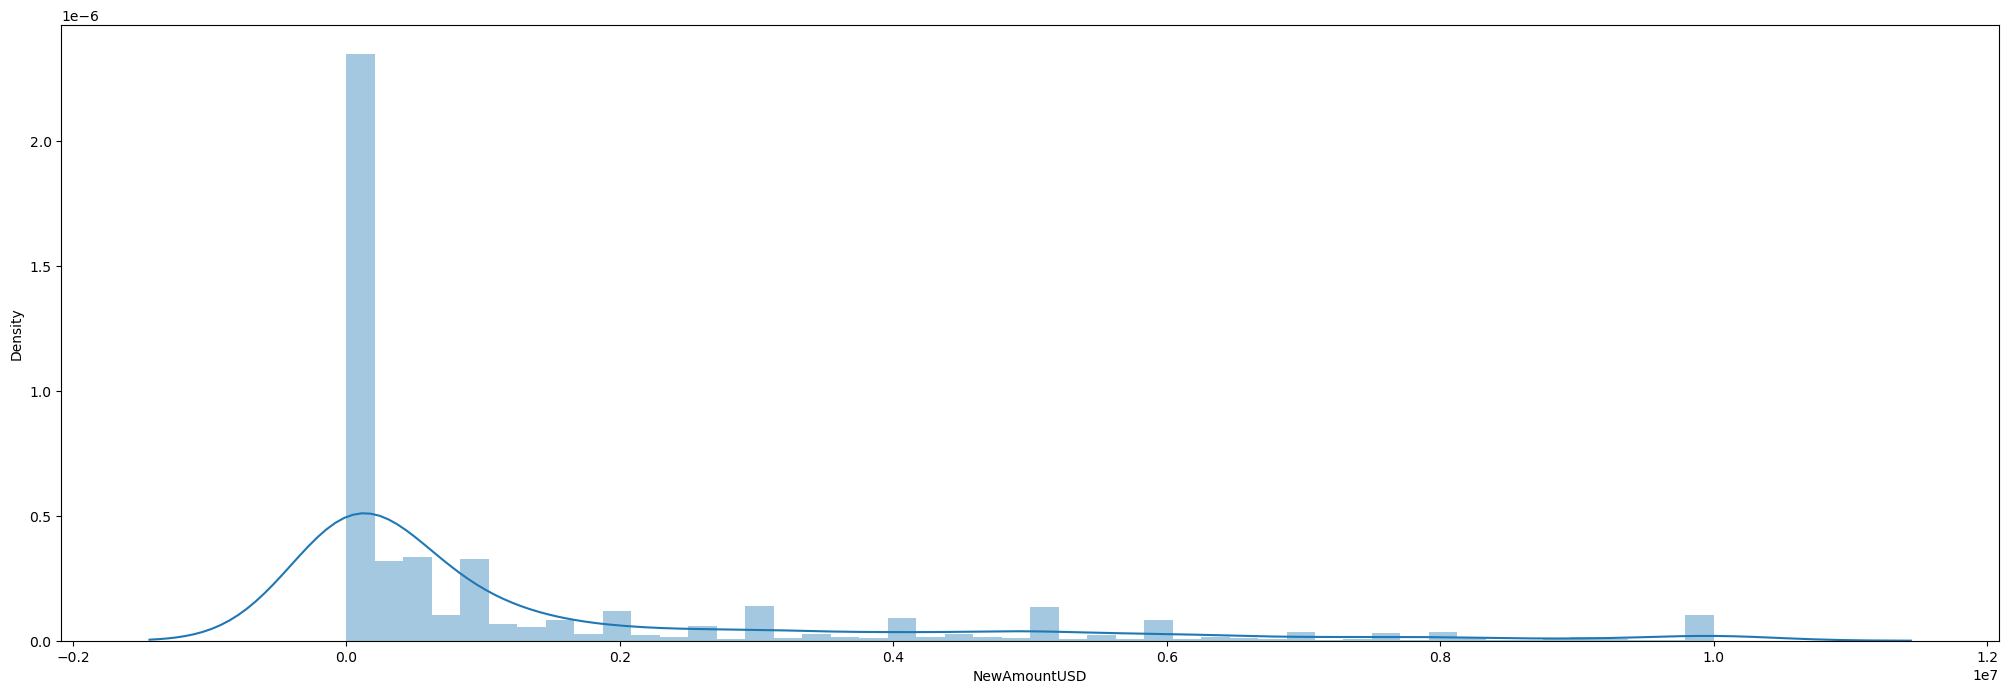

In [121]:
plt.figure(figsize=(25,8))
sns.distplot(startup_data.loc[startup_data['NewAmountUSD']<=10000000.0, 'NewAmountUSD'])     
plt.show()

# the above plot shows the distribution of the funding amount for the startups that have raised less than 10 million USD  with x axis as the funding amount and y axis as the density of the funding amount, The density is calculated using the kernel density estimation and the distribution is skewed to the right

In [122]:
funding_average = startup_data['NewAmountUSD'].mean()
funding_meadian = startup_data['NewAmountUSD'].median()
print("Average :", funding_average)
print("Median :", funding_meadian)

Average : 21707685412748.387
Median : 500000.0


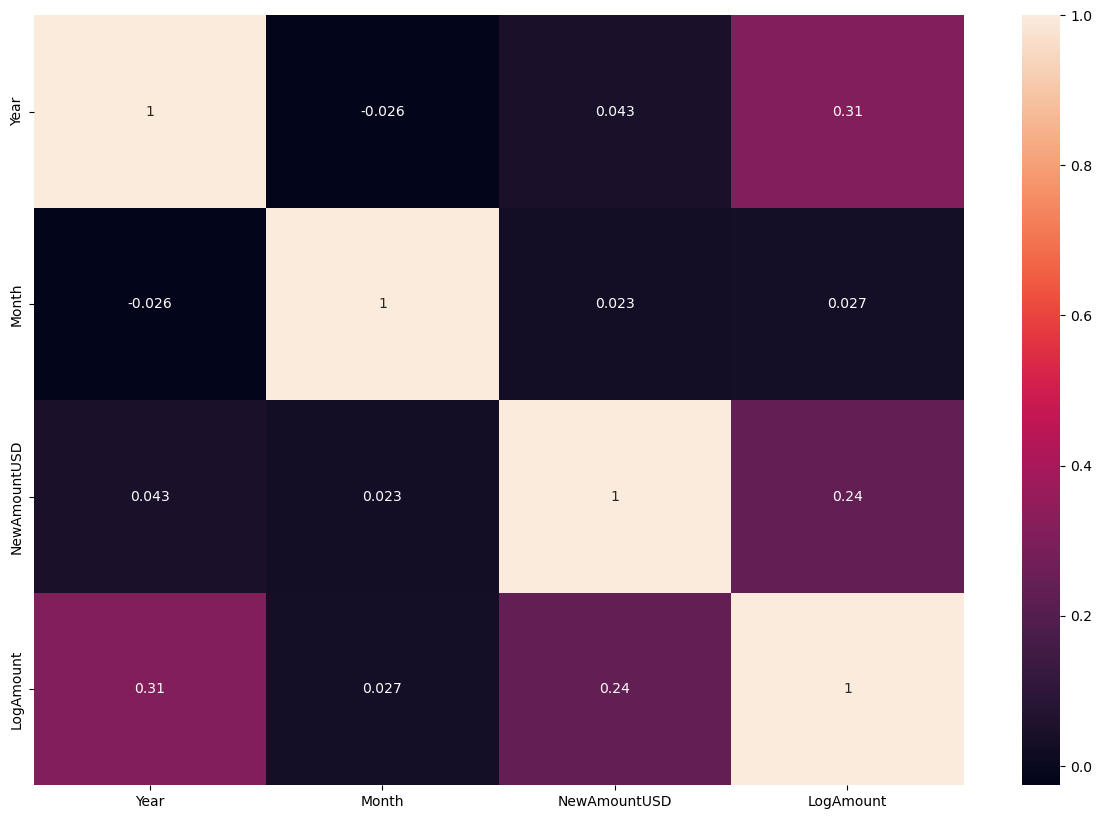

In [123]:
# Perform correlation analysis on the data and plot the heatmap

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(startup_data.corr(), annot=True, ax=ax)
plt.show()


Ttest_indResult(statistic=nan, pvalue=nan)

## Multiple Fundings

In [40]:
# Make a list of all the unique companies in the dataset
companies = startup_data['StartupName'].unique()
# print total number of unique companies
print(len(companies))

# Make a list of all the companies that got funding multiple times and their corresponding number of fundings
multiple_fundings = startup_data['StartupName'].value_counts().loc[lambda x: x>1]
# print total number of companies that got funding multiple times
print(len(multiple_fundings))


2580
464


In [41]:
# Now add the multiple_fundings list to a txt file
with open('multiple_fundings.txt', 'w') as f:
    for item in multiple_fundings.index:
        f.write("%s\n" % item)


In [42]:
# create a new dataframe with only the companies that got funding multiple times and their corresponding number of fundings and their first funding date and last funding date. Use the original dataframe 

multiple_fundings_df = data[data['StartupName'].isin(multiple_fundings.index)]
# adding the first funding date and last funding date to the dataframe
multiple_fundings_df = multiple_fundings_df.groupby('StartupName').agg({'Date':['min', 'max'], 'NewAmountUSD':'sum'})
multiple_fundings_df.columns = ['FirstFundingDate', 'LastFundingDate', 'TotalFunding']
multiple_fundings_df.reset_index(inplace=True)

# Sort the dataframe by the total number of fundings in descending order
multiple_fundings_df.sort_values(by='TotalFunding', ascending=False, inplace=True)
# multiple_fundings_df.head()

# Reset the index of the dataframe
multiple_fundings_df.reset_index(drop=True, inplace=True)


# Add a start data and end date column to the dataframe with start being 1 year before the first funding date and end being on the last funding date
multiple_fundings_df['StartDate'] = multiple_fundings_df['FirstFundingDate'].apply(lambda x: x - pd.DateOffset(years=1))
multiple_fundings_df['EndDate'] = multiple_fundings_df['LastFundingDate']

multiple_fundings_df.head()


,StartupName,FirstFundingDate,LastFundingDate,TotalFunding,StartDate,EndDate
0,Unacademy,2016-12-05,2020-11-25,7.500000e+16,2015-12-05,2020-11-25
1,Flipkart,2015-04-06,2020-07-15,5.259700e+09,2014-04-06,2020-07-15
2,Paytm,2015-03-13,2019-11-25,3.148950e+09,2014-03-13,2019-11-25
3,True North,2018-08-30,2018-08-30,2.400000e+09,2017-08-30,2018-08-30
4,Udaan,2016-11-23,2019-02-10,1.545000e+09,2015-11-23,2019-02-10


In [43]:
# Print the shape of the dataframe
print(multiple_fundings_df.shape)

(464, 6)


In [60]:
startup_data.head()

,Year,Month,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,NewAmountUSD
Date,,,,,,,,,
2017-02-02,2017,2,Clodura,Technology,Intelligent Sales Assistant,Pune,Undisclosed Investors,Seed Funding,0.0
2017-03-02,2017,3,Stockroom.io,Consumer Internet,Curated Platform for Developers,Hyderabad,"Satya D Sinha, Gyanendra Singh",Seed Funding,0.0
2017-06-02,2017,6,Capital Float,Consumer Internet,Online lending platform,Bengaluru,IFMR Capital Finance,Private Equity,2500000.0
2017-06-02,2017,6,iManageMyHotel,Technology,Hotel Management Solution,Kolkata,Jaarvis Accelerator,Seed Funding,0.0
2017-07-02,2017,7,Inner Hour,Consumer Internet,Online Counselling Platform,Mumbai,"Batlivala & Karani Securities, Venture Works",Seed Funding,450000.0


## Extracting Twitter Handles

In [44]:
multiple_fundings_df['StartupName']

0           Unacademy
1            Flipkart
2               Paytm
3          True North
4               Udaan
            ...      
459      Leverage Edu
460          Lucideus
461      Tyre Express
462    Mad Street Den
463          MobiDent
Name: StartupName, Length: 464, dtype: object

In [48]:
import tweepy

# Set up your Twitter API credentials
consumer_key = 'key'
consumer_secret = 'cs'                  # removed these values for privacy reasons
access_token = 'token'
access_token_secret = 'access'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Create a list of all the Twitter handles of the companies
twitter_handles = []

for company in multiple_fundings_df['StartupName']:
    print(company)
    try:
        user = api.get_user(screen_name=company)
        twitter_handles.append(user.screen_name)
        print(user.screen_name)
    except:
        twitter_handles.append('Not Found')

print(twitter_handles)


Unacademy
unacademy
Flipkart
Flipkart
Paytm
Paytm
True North
Udaan
UDAAN
Pratilipi
PRATILIPI
BYJU’S
Ola
ola
Snapdeal
snapdeal
Nykaa
nykaa
Zomato
zomato
Ola Cabs
Byju’s
Swiggy
Swiggy
Bombay Shaving Company
BigBasket
bigbasket
FabHotels
FabHotels
Meesho
meesho
Cure Fit
GOQii
GOQii
Five Star Group
Dream11
Dream11
Book My Show
PolicyBazaar
policybazaar
Oyo Rooms
Grofers
grofers
Fingerlix
fingerlix
Phone Pe
OYO Rooms
Delhivery
delhivery
Uniphore
uniphore
Zilingo
Zilingo
Quikr
Quikr
MakeMyTrip
makemytrip
Pepperfry
Pepperfry
Cars24
cars24
CarDekho
CarDekho
Digit
digit
Zenoti
Ecom Express
OyoRooms
oyorooms
1mg
1MG
ShopX
Shopx
Rivigo
rivigo
Netmeds
NetMeds
FreshToHome
freshtohome
Bira 91
Blackbuck
blackbuck
AutoGrid
autogrid
Vedantu
vedantu
Kissht
kissHt
Ofbusiness
Ofbusiness
Chumbak
Chumbak
Shopclues
ShopClues
Lendingkart
Lendingkart
Saavn
saavn
Foodpanda
FoodPanda
Icertis
icertis
Dunzo
dunzo
Mobikwik
MobiKwik
Ather Energy
Groww
Groww
Practo
Practo
Urban Ladder
Shuttl
shuttl
Moglix
moglix
Chil

In [49]:
# Add the twitter handles to the dataframe
multiple_fundings_df['TwitterHandle'] = twitter_handles


In [50]:
multiple_fundings_df

,StartupName,FirstFundingDate,LastFundingDate,TotalFunding,StartDate,EndDate,TwitterHandle
0,Unacademy,2016-12-05,2020-11-25,7.500000e+16,2015-12-05,2020-11-25,unacademy
1,Flipkart,2015-04-06,2020-07-15,5.259700e+09,2014-04-06,2020-07-15,Flipkart
2,Paytm,2015-03-13,2019-11-25,3.148950e+09,2014-03-13,2019-11-25,Paytm
3,True North,2018-08-30,2018-08-30,2.400000e+09,2017-08-30,2018-08-30,Not Found
4,Udaan,2016-11-23,2019-02-10,1.545000e+09,2015-11-23,2019-02-10,UDAAN
...,...,...,...,...,...,...,...
459,Leverage Edu,2017-02-08,2017-06-11,0.000000e+00,2016-02-08,2017-06-11,Not Found
460,Lucideus,2016-01-09,2017-10-05,0.000000e+00,2015-01-09,2017-10-05,Lucideus
461,Tyre Express,2017-01-20,2017-03-04,0.000000e+00,2016-01-20,2017-03-04,Not Found
462,Mad Street Den,2015-01-30,2018-05-09,0.000000e+00,2014-01-30,2018-05-09,Not Found


In [51]:
# Make a new data frame with only the companies that have a twitter handle
multiple_fundings_df_twitter = multiple_fundings_df[multiple_fundings_df['TwitterHandle'] != 'Not Found']
multiple_fundings_df_twitter.reset_index(drop=True, inplace=True)
multiple_fundings_df_twitter


,StartupName,FirstFundingDate,LastFundingDate,TotalFunding,StartDate,EndDate,TwitterHandle
0,Unacademy,2016-12-05,2020-11-25,7.500000e+16,2015-12-05,2020-11-25,unacademy
1,Flipkart,2015-04-06,2020-07-15,5.259700e+09,2014-04-06,2020-07-15,Flipkart
2,Paytm,2015-03-13,2019-11-25,3.148950e+09,2014-03-13,2019-11-25,Paytm
3,Udaan,2016-11-23,2019-02-10,1.545000e+09,2015-11-23,2019-02-10,UDAAN
4,Pratilipi,2018-05-02,2019-06-06,1.515250e+09,2017-05-02,2019-06-06,PRATILIPI
...,...,...,...,...,...,...,...
326,MonkeyBox,2016-11-30,2017-07-21,0.000000e+00,2015-11-30,2017-07-21,Monkeybox
327,Scandid,2015-07-10,2016-04-10,0.000000e+00,2014-07-10,2016-04-10,Scandid
328,LetsMD,2016-02-11,2016-12-29,0.000000e+00,2015-02-11,2016-12-29,LetsMD
329,Lucideus,2016-01-09,2017-10-05,0.000000e+00,2015-01-09,2017-10-05,Lucideus


In [52]:
# # making a csv file 

multiple_fundings_df_twitter.to_csv('multiple_fundings_df_twitter.csv', index=False)


In [ ]:
# 